In [ ]:
#We first install  pycaret
# install the full version
!pip install pycaret[full]

In [ ]:
!pip install pycaret-ts-alpha

In [ ]:
#Import important modules
import pandas as pd
from pycaret.time_series import *

In [ ]:
nyc_energy_df = pd.read_csv('nyc_energy_consumption.csv')
nyc_energy_df.head(10)

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61
5,2012-01-01 05:00:00,4274.7,0.0,39.02
6,2012-01-01 06:00:00,4324.9,0.0,38.78
7,2012-01-01 07:00:00,4350.0,0.0,42.74
8,2012-01-01 08:00:00,4480.9,0.0,38.90
9,2012-01-01 09:00:00,4664.2,0.0,44.67


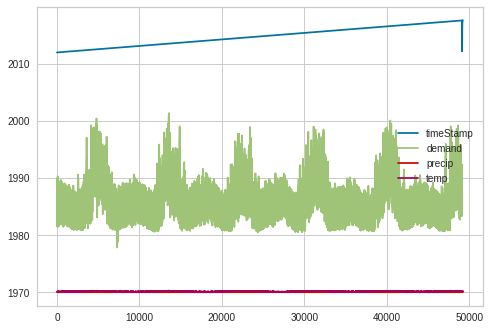

In [ ]:
nyc_energy_df.plot();

In [ ]:
nyc_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
nyc_energy_df['timeStamp']=pd.to_datetime(nyc_energy_df['timeStamp'])
nyc_energy_df1 = nyc_energy_df[['timeStamp','demand']].rename({'timeStamp':'Date','demand':'Total'}, axis='columns')
nyc_energy_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    49205 non-null  datetime64[ns]
 1   Total   49124 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 769.0 KB


In [ ]:
nyc_energy_df1.head()

,Date,Total
0,2012-01-01 00:00:00,4937.5
1,2012-01-01 01:00:00,4752.1
2,2012-01-01 02:00:00,4542.6
3,2012-01-01 03:00:00,4357.7
4,2012-01-01 04:00:00,4275.5


In [ ]:
nyc_energy_df1 = nyc_energy_df1.set_index('Date')
nyc_energy_df_monthly = nyc_energy_df1.resample('M').mean()

In [ ]:
nyc_energy_df_monthly.head()

,Total
Date,
2012-01-31,5757.495833
2012-02-29,5622.331609
2012-03-31,5479.845491
2012-04-30,5368.945833
2012-05-31,5867.896102


In [ ]:
nyc_energy_df_monthly.shape

(68, 1)

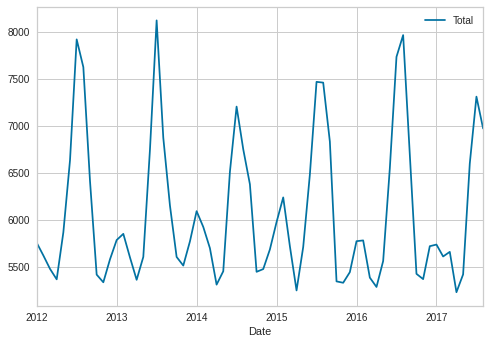

In [ ]:
nyc_energy_df_monthly.plot();

In [ ]:
exp_ny = setup(nyc_energy_df_monthly, fh = 7, fold = 3, session_id = 123)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: bdfc
INFO:logs:self.variable_keys: {'seed', 'fold_generator', 'master_model_container', 'fh', '_all_models_internal', '_ml_usecase', 'y_transformed', 'exp_name_log', 'strictly_positive', 'exogenous_present', 'html_param', 'enforce_exogenous', 'X_train', 'memory', 'idx', '_gpu_n_jobs_param', 'enforce_pi', 'index_type', 'X_train_transformed', 'X_test', 'y_train_transformed', 'X', 'USI', 'pipeline', 'gpu_param', 'logging_param', 'display_container', 'experiment__', 'y_test_transformed', 'fold_groups_param_full', 'all_sp_values', 'log_plots_param', 'y_train', 'y_test', 'fold_param', 'primary_sp_to_use', 'seasonality_present', 'seasonal_period', 'X_test_transformed', 'exp_id', 'X_transformed', 'approach_type', 'n_jobs_param', 'data', '_all_metrics', 'variable_keys', '_available_plots', 'y', '_

,Description,Value
0,session_id,123
1,Target,Total
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(68, 1)"
5,Train data shape,"(61, 1)"
6,Test data shape,"(7, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 2.02s...............


In [ ]:
exp_ny.plot_model(plot = 'ts')

INFO:logs:Visual Rendered Successfully


In [ ]:
# Diagnostics plot
exp_ny.plot_model(plot = 'diagnostics')

INFO:logs:Visual Rendered Successfully


In [ ]:
# Decomposition plot
exp_ny.plot_model(plot = 'decomp_stl')

INFO:logs:Visual Rendered Successfully


In [ ]:
# Model Training
best = exp_ny.compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,187.1074,250.3868,0.0279,0.0283,0.9093,0.8782,0.9008,0.0867
ets,ETS,197.1762,274.9431,0.0298,0.0304,0.9545,0.9627,0.8685,0.1133
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,198.6697,270.5317,0.0307,0.031,0.9624,0.9461,0.8425,0.5167
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,200.2229,253.7641,0.0314,0.0317,0.9692,0.8868,0.8541,0.6867
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & De...,205.123,274.5585,0.032,0.0323,0.9929,0.9592,0.844,1.4833
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,209.6959,268.0509,0.0325,0.0329,1.016,0.9379,0.8504,0.0433
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,209.0432,278.3119,0.0326,0.0329,1.0146,0.9738,0.8342,0.0433
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,211.46,270.4611,0.033,0.0332,1.0237,0.9456,0.8433,0.1000
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,210.2404,274.4537,0.0332,0.0334,1.0173,0.9585,0.8264,0.6800
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,212.3553,265.5338,0.0333,0.0335,1.0283,0.9286,0.8471,0.0400


INFO:logs:master_model_container: 29
INFO:logs:display_container: 2
INFO:logs:ExponentialSmoothing(seasonal='mul', sp=12, trend='add')
INFO:logs:compare_models() successfully completed......................................


In [ ]:
# Best Model Plotting
exp_ny.plot_model(best, plot = 'forecast')

INFO:logs:Visual Rendered Successfully


In [ ]:
# forecast in unknown future
exp_ny.plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})

INFO:logs:Visual Rendered Successfully


In [ ]:
# in-sample plot
exp_ny.plot_model(best, plot = 'insample')

INFO:logs:Visual Rendered Successfully


In [ ]:
# residuals plot
exp_ny.plot_model(best, plot = 'residuals')

INFO:logs:Visual Rendered Successfully


In [ ]:
# diagnostics plot
exp_ny.plot_model(best, plot = 'diagnostics')

INFO:logs:Visual Rendered Successfully


In [ ]:
# save the best model
exp= save_model(best, 'my_best_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ExponentialSmoothing(seasonal='mul', sp=12, trend='add'), model_name=my_best_model, prep_pipe_=None, verbose=True, use_case=MLUsecase.TIME_SERIES, kwargs={})
INFO:logs:Adding model into prep_pipe
INFO:logs:my_best_model.pkl saved in current working directory
INFO:logs:ExponentialSmoothing(seasonal='mul', sp=12, trend='add')
INFO:logs:save_model() successfully completed......................................


Transformation Pipeline and Model Successfully Saved
